In [54]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

print("Libaraires loaded")

Libaraires loaded


# Now we need a dataset to work on

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Now I will look for null values

In [7]:
df.gender.isnull().sum()

0

In [8]:
df.age.isnull().sum()

0

In [9]:
df.shape

(5110, 12)

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.bmi.isnull().sum()

201

I found null values in the BMI field. Since this is a numeric value, I will replace those missing values with the mean

In [12]:
mean_bmi = df.bmi.mean()

df['bmi'].replace(np.nan, mean_bmi, inplace= True)

df.bmi.isnull().sum()

/var/folders/ch/kb1qmx591n5c2yvx2fc6ffyw0000gn/T/ipykernel_4152/1954132604.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].replace(np.nan, mean_bmi, inplace= True)


0

In [14]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [15]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [16]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [17]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

# Instead of checking every single column independently to see how many unique values there are, I will just apply the nunique() function on the whole dataframe

In [18]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

# I want to check work type and smoking status here

In [19]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [20]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [21]:
df.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [22]:
freq_smoker = df.smoking_status.value_counts().idxmax()

df.replace("Unknown", freq_smoker, inplace= True)


In [23]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

# Visualizing the data

In [24]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [25]:
df1 = df.copy()

In [26]:
df1.drop(df[df['gender'] == 'Other'].index, inplace= True)


In [27]:
df1.gender.value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

<Axes: xlabel='ever_married', ylabel='count'>

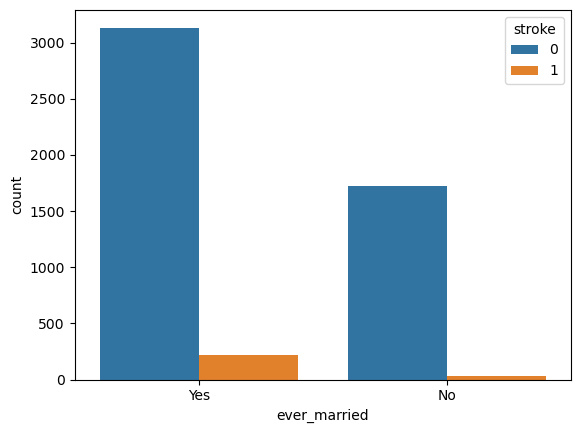

In [28]:
sns.countplot(x = df1['ever_married'], hue= df1['stroke'])

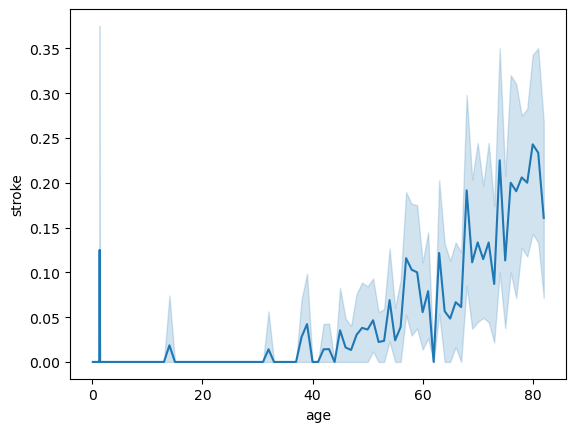

<Figure size 1200x800 with 0 Axes>

In [29]:
sns.lineplot(x = df1['age'], y = df1['stroke'])
plt.figure(figsize= (12,8))
plt.show()

<Axes: xlabel='gender', ylabel='count'>

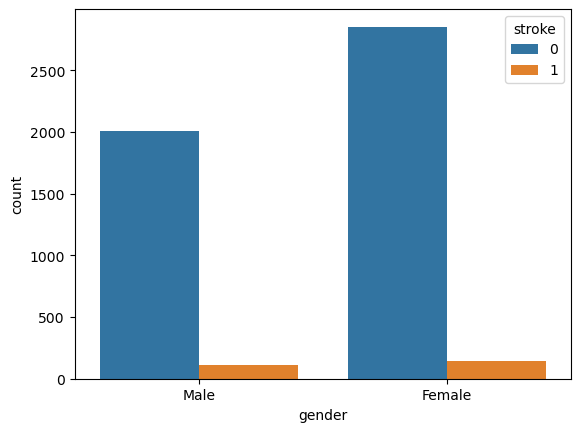

In [38]:
sns.countplot(x = df1['gender'], hue = df1['stroke'])

Text(0, 0.5, 'Number of people')

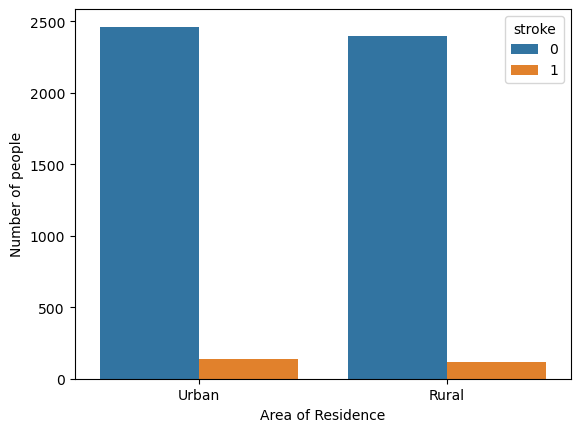

In [30]:
sns.countplot(x = df1['Residence_type'], hue = df1['stroke'])
plt.xlabel("Area of Residence")
plt.ylabel("Number of people")

Text(0, 0.5, 'Number of people')

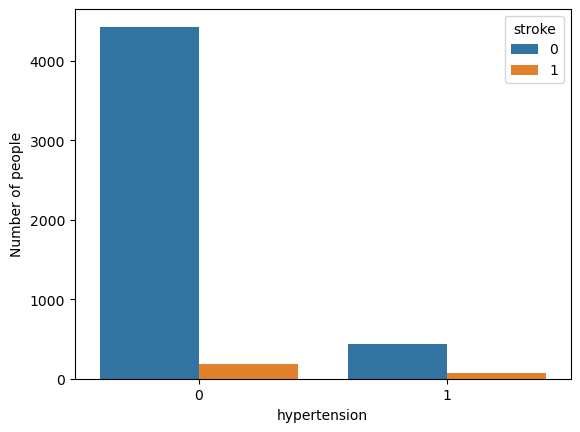

In [31]:
sns.countplot(x = df1['hypertension'], hue= df1['stroke'])
plt.ylabel("Number of people")

Text(0, 0.5, 'Count of patients')

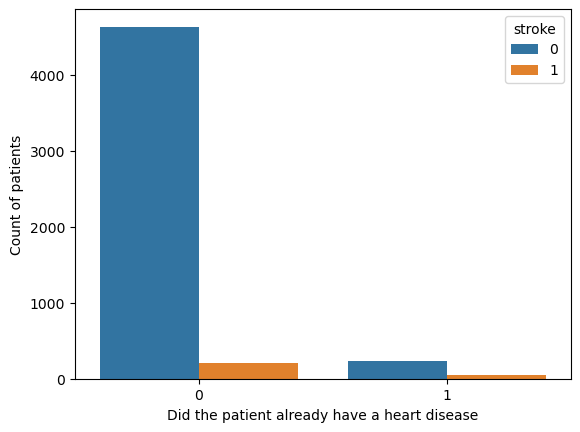

In [32]:
sns.countplot(x = df1['heart_disease'], hue= df1['stroke'])
plt.xlabel("Did the patient already have a heart disease")
plt.ylabel("Count of patients")

Text(0, 0.5, 'Number of patients')

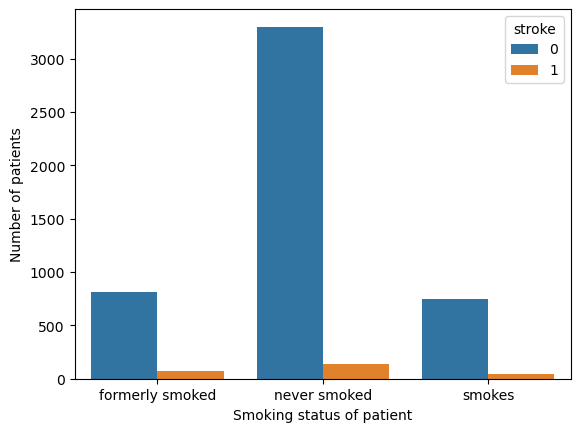

In [37]:
sns.countplot(x = df1['smoking_status'], hue = df1['stroke'])
plt.xlabel("Smoking status of patient")
plt.ylabel("Number of patients")

In [35]:
df1.corr

<bound method DataFrame.corr of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             

Now to plot this on a graph

<Axes: >

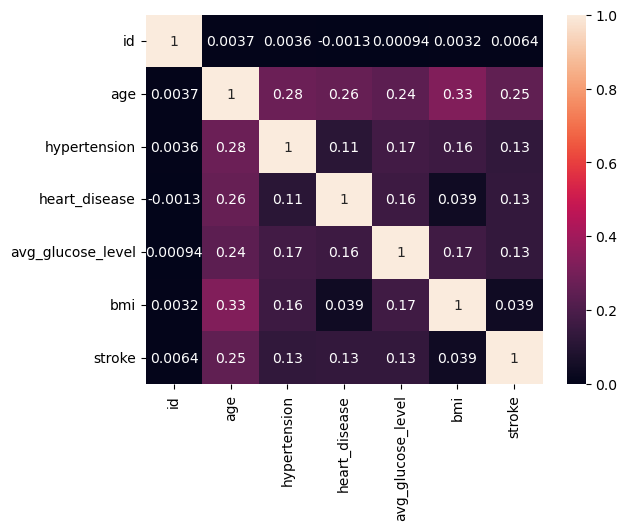

In [68]:
correlation_matrix = df1.corr(method='pearson', numeric_only=True).transpose()

sns.heatmap(correlation_matrix, annot=True)

# Training a Regression Model

In [40]:
X = df1[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = df1['stroke']

Splitting data into training and testing sets

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

In [49]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

# Evaluating the model

Making predictions

In [50]:
y_hat = lg.predict(X_test)

y_hat.shape

(1022,)

Checking the accuracy of the model

In [51]:
accuracy = accuracy_score(y_test, y_hat)
accuracy

0.9412915851272016

The accuracy of this model is 94% which makes is highly accurate

In [53]:
cm = confusion_matrix(y_test, y_hat)

cm

array([[962,   0],
       [ 60,   0]])

In [55]:
scores = cross_val_score(lg, X, y, cv= 5)

print(scores)
print(scores.mean())

[0.95107632 0.95107632 0.95107632 0.95107632 0.95200784]
0.9512626238425549


# I did not need to perform one-hot encoding in this project because the features I used to train the linear regression model on were all numeric